## A) Simulation
yTrue = sin(kx +ϕ)

error floor is 0.1

signal-to-noise ratio is 5:1, therefore measurement error is 1:5 or 0.2

meas_err = 0.2

error floor = 0.1

sig^2 = meas_err^2 + err_floor^2 => sig = (meas_err^2 + err_floor^2)^(0.5)

In [8]:
#imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import pi
from scipy.optimize import curve_fit
from scipy.stats import multivariate_normal

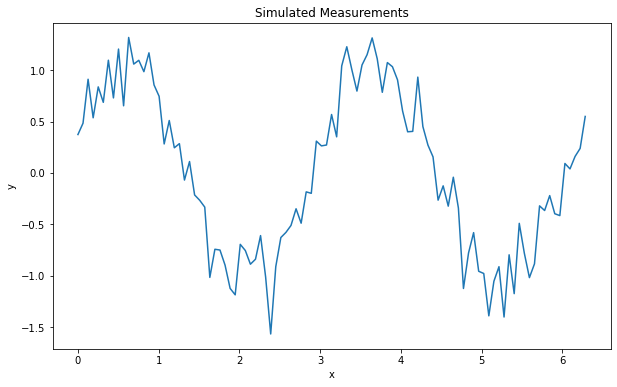

In [19]:
N = 101
k = 2.
phi = pi/6.
meas_err = 0.2
err_floor = 0.1

x = np.linspace(0, 2*pi, N)

def model_sin(k, x, phi):
    return np.sin(k*x + phi)

# standard deviation:
sig = np.sqrt(meas_err**2 + err_floor**2)

# simulated measurements:
y = model_sin(k, x, phi) + np.random.randn(x.shape[0])*sig

plt.figure(figsize=(10,6))
plt.title("Simulated Measurements")
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## B) Alternative Model Fitting

best fit k and phi: 2.017034879169794 0.4257106379297341
compare with input k and phi: 2.0 0.5235987755982988
errors on k and phi: 0.01653085101151349 0.06309654694603371
chi2, chi2_nu, DOF are 95.379, 0.963, 99, respectively.


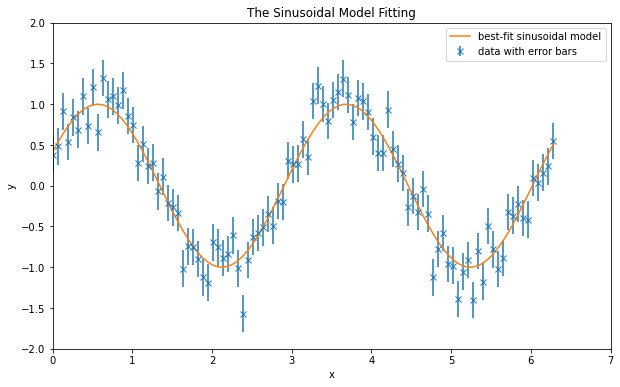

In [21]:
# The sinusoidal model

coeffs, cov = curve_fit(model_sin, x, y, p0=[1.5, pi/4.])

k_best = coeffs[0]
phi_best = coeffs[1]

print("best fit k and phi:", k_best, phi_best)
print("compare with input k and phi:", k, phi)

k_sig = np.sqrt(cov[0, 0])
phi_sig = np.sqrt(cov[1, 1])
print("errors on k and phi:", k_sig, phi_sig)

plt.figure(figsize=(10,6))
plt.title("The Sinusoidal Model Fitting")
plt.errorbar(x, y, yerr=sig, fmt="x", label='data with error bars')
plt.plot(x, model_sin(x, k_best, phi_best), label='best-fit sinusoidal model')
plt.legend()
plt.xlabel("x")  
plt.ylabel("y") 
plt.xlim(0, 7)
plt.ylim(-2, 2)

# calculating Chi^2

chi2_min = ((y - model_sin(x, k_best, phi_best))**2/sig**2).sum()
DOF = N - 2
chi2_nu = chi2_min/DOF

print("chi2, chi2_nu, DOF are {:.3f}, {:.3f}, {:d}, respectively.".format(chi2_min, chi2_nu, DOF))


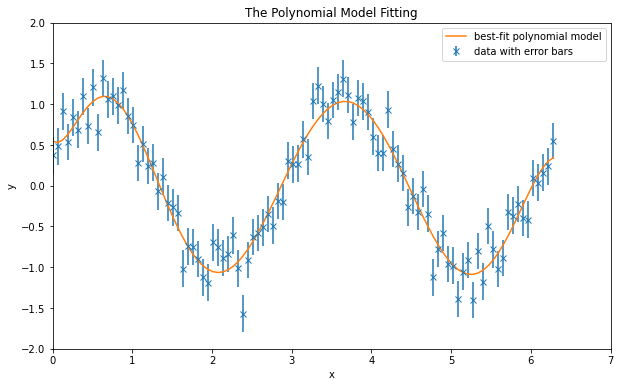

Best-fit polynomial coefficients:
[0.547 -0.809 9.049 -15.199 9.799 -3.098 0.514 -0.043 0.001]
chi2, chi2_nu, DOF are 92.902, 1.010, 92, respectively.


In [22]:
# The polynomial model

def model_poly(x, c0, c1, c2, c3, c4, c5, c6, c7, c8):
    return c0 + c1 * x + c2 * x**2 + c3 * x**3 + c4 * x**4 + c5 * x**5 + c6 * x**6 + c7 * x**7 + c8 * x**8

coeffs, cov = curve_fit(model_poly, x, y)

plt.figure(figsize=(10,6))
plt.title("The Polynomial Model Fitting")
plt.errorbar(x, y, yerr=sig, fmt="x", label='data with error bars')
plt.plot(x, model_poly(x, coeffs[0], coeffs[1], coeffs[2], coeffs[3], coeffs[4], coeffs[5], coeffs[6], coeffs[7], coeffs[8]), label='best-fit polynomial model')
plt.legend()
plt.xlabel("x")  
plt.ylabel("y") 
plt.xlim(0, 7)
plt.ylim(-2, 2)

plt.show()
# calculating Chi^2

chi2_min = ((y - model_poly(x, coeffs[0], coeffs[1], coeffs[2], coeffs[3], coeffs[4], coeffs[5], coeffs[6], coeffs[7], coeffs[8]))**2/sig**2).sum()

DOF = N - 9
chi2_nu = chi2_min/DOF
np.set_printoptions(formatter={'float': '{:.3f}'.format})

print("Best-fit polynomial coefficients:")
print(coeffs)
print("chi2, chi2_nu, DOF are {:.3f}, {:.3f}, {:d}, respectively.".format(chi2_min, chi2_nu, DOF))